In [4]:
######################################### Dependencies / CSV's / Merging #################################
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib.pyplot import figure

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
City_Data = pd.read_csv(city_data_to_load)
Ride_Data = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
# Combined using the city column, merginging to the left to preserve all of the Ride Data rows
Combined_Data = pd.merge(Ride_Data, City_Data, left_on='city', right_on = 'city', how='left', sort=False )
Combined_DF = pd.DataFrame(Combined_Data)

############################## Cleaning Data for Future Use ##############################
#Groupby City to get city totals
Grouped_City_DF = Combined_DF.groupby('city')

#City Data Frame
### Average Fare
### Number of Rides
City_Grouped = Grouped_City_DF.agg({
    'fare' : 'mean',
    'ride_id' : 'count'})
City_Clean_DF = pd.merge(City_Grouped, City_Data, on='city')
City_Clean_DF = City_Clean_DF.rename(columns={
    'city' : 'City',
    'fare' : 'Fare',
    'ride_id':'Rides',
    'driver_count':'Drivers',
    'type':'Type'})

############ Use These Groups for 1st Scatter Plot #####################

#Create DF of Urban Only Data
Urban_Clean=City_Clean_DF.loc[City_Clean_DF['Type']=='Urban']


#Create DF of Suburban Only Data
Suburban_Clean = City_Clean_DF.loc[City_Clean_DF['Type']=='Suburban']

#Create DF of Rural Only Data
Rural_Clean = City_Clean_DF.loc[City_Clean_DF['Type']=='Rural']
#######################################################################

# Display the data table for preview
Combined_DF.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

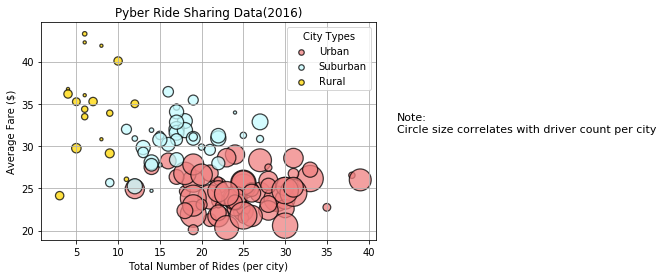

In [7]:
############################## Bubble Plot ####################################
# Obtain the x and y coordinates for each of the three city types


UrbanX_Axis = Urban_Clean['Rides']
UrbanY_Axis = Urban_Clean['Fare']
Urban_Size = (Urban_Clean['Drivers']*10)

SubX_Axis = Suburban_Clean['Rides']
SubY_Axis = Suburban_Clean['Fare']
Sub_Size = (Suburban_Clean['Drivers']*10)

RurX_Axis = Rural_Clean['Rides']
RurY_Axis = Rural_Clean['Fare']
Rur_Size = (Rural_Clean['Drivers']*10)

# Build the scatter plots for each city types
Urban_Scatter = plt.scatter(UrbanX_Axis, UrbanY_Axis,
                            marker = "o",
                            s = Urban_Size,
                            facecolors = "#F08080",
                            edgecolors = "black",
                            label = 'Urban',
                            alpha = 0.75,
                            linewidth = 1.25)
Sub_Scatter = plt.scatter(SubX_Axis,
                          SubY_Axis,
                          marker = "o",
                          s = Sub_Size,
                          facecolors = "xkcd:light sky blue",
                          edgecolors = "black",
                          label = 'Suburban',
                          alpha = 0.75,
                          linewidth = 1.25)
Rur_Scatter = plt.scatter(RurX_Axis,
                          RurY_Axis,
                          marker = "o",
                          s = Rur_Size,
                          facecolors = "gold",
                          edgecolors = "black",
                          label = 'Rural',
                          alpha = 0.75,
                          linewidth = 1.25)

## Color References
# Gold = Gold
# Light Coral Color = #F08080
# Light Blue Sky = xkcd:light sky blue

# Incorporate the other graph properties

plt.title("Pyber Ride Sharing Data(2016)")
plt.xlabel('Total Number of Rides (per city)')
plt.ylabel ('Average Fare ($)')
plt.grid()


# Create a legend

lgnd = plt.legend(title = 'City Types')
lgnd.legendHandles[0]._sizes=[30]
lgnd.legendHandles[1]._sizes=[30]
lgnd.legendHandles[2]._sizes=[30]

# Incorporate a text label regarding circle size

txt="Note:\nCircle size correlates with driver count per city"
plt.figtext(0.95, 0.5, txt, wrap=True, horizontalalignment='left', fontsize=11)

# Save Figure
plt.savefig('Pyber_Ride_Sharing_Scatter.png', bbox_inches='tight')

plt.show()

## Total Fares by City Type

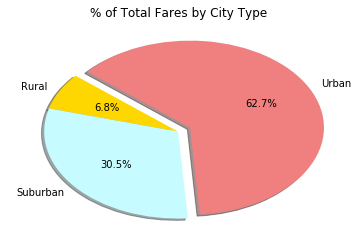

<Figure size 432x288 with 0 Axes>

In [13]:
############################## Total Fares by City Type ####################################

# Calculate Type Percents

#Groupby by type and sum of fares
Fare_Total_byType = Combined_DF.groupby('type')
Fare_Totals = Fare_Total_byType['fare'].sum()

#Convert series into DF with an index
Fare_TotalDF = pd.DataFrame({'type':Fare_Totals.index, 'fares':Fare_Totals.values})

# Build Pie Chart
labels = Fare_TotalDF['type']
colors = ['gold', 'xkcd:light sky blue', '#F08080']
sizes = Fare_TotalDF['fares']
explode = (0, 0, 0.1)
plt.pie(sizes, labels=labels, colors=colors, startangle=140, explode = explode, autopct = "%1.1f%%", shadow = True)
plt.title("% of Total Fares by City Type")
plt.show()

# Save Figure
plt.savefig('Total_Fares_By_City_Pie.png')

## Total Rides by City Type

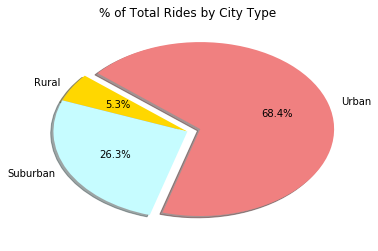

<Figure size 432x288 with 0 Axes>

In [11]:
############################## Total Rides by City Type ####################################

#Groupby to identify types and ride totals per type
Rides_Total_byType = Combined_DF.groupby('type')
Rides_Totals = Rides_Total_byType['ride_id'].count()

#Convert series into DF with an index
Rides_TotalDF = pd.DataFrame({'type':Rides_Totals.index, 'Rides':Rides_Totals.values})

# Build Pie Chart
labels = Rides_TotalDF['type']
colors = ['gold', 'xkcd:light sky blue', '#F08080']
sizes = Rides_TotalDF['Rides']
explode = (0, 0, 0.1)
plt.pie(sizes, labels=labels, colors=colors, startangle=140, explode = explode, autopct = "%1.1f%%", shadow = True)
plt.title("% of Total Rides by City Type")
plt.show()
# Save Figure
plt.savefig('Total_Rides_By_City_Pie.png')

## Total Drivers by City Type

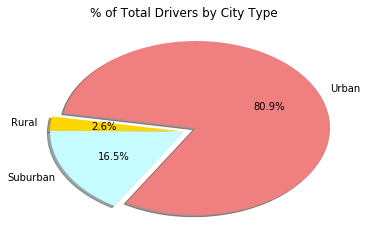

<Figure size 432x288 with 0 Axes>

In [12]:
############################## Total Drivers by City Type ####################################

#Groupby to identify types and drivers totals per type
Drivers_Total_byType = City_Clean_DF.groupby('Type')
Drivers_Totals = Drivers_Total_byType['Drivers'].sum()

#Convert series into DF with an index
Drivers_TotalDF = pd.DataFrame({'type':Drivers_Totals.index, 'Drivers':Drivers_Totals.values})

# Build Pie Charts
labels = Drivers_TotalDF['type']
colors = ['gold', 'xkcd:light sky blue', '#F08080']
sizes = Drivers_TotalDF['Drivers']
explode = (0, 0, 0.1)
plt.pie(sizes, labels=labels, colors=colors, startangle=170, explode = explode, autopct = "%1.1f%%", shadow = True)
plt.title("% of Total Drivers by City Type")
plt.show()


# Save Figure
plt.savefig('Total_Drivers_By_City_Type_Pie.png')